In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("climate/file1f43b983122_lat=52.25_lng=5.5_period=20000501-20240917.csv", sep=",", skiprows=11)

# Convert datetime column to datetime format
df['datetime_lst'] = pd.to_datetime(df['datetime_lst'])

# Calculate daily mean and max temperatures
daily_max_temp = df.groupby(df['datetime_lst'].dt.date)['t2m'].max()

# Filter days where mean temp >= 15°C
daily_mean_temp = df.groupby(df['datetime_lst'].dt.date)['t2m'].mean()
valid_days = daily_mean_temp[daily_mean_temp >= 18].index

# Create three filtered datasets based on max temperature ranges
range_20_25 = daily_max_temp[(daily_max_temp >= 20) & (daily_max_temp < 25)].index
range_25_30 = daily_max_temp[(daily_max_temp >= 25) & (daily_max_temp < 30)].index
range_above_30 = daily_max_temp[daily_max_temp >= 30].index

# Intersection with valid days (mean temp >= 15)
range_20_25 = valid_days.intersection(range_20_25)
range_25_30 = valid_days.intersection(range_25_30)
range_above_30 = valid_days.intersection(range_above_30)

# Filter datasets
df_20_25 = df[df['datetime_lst'].dt.date.isin(range_20_25)]
df_25_30 = df[df['datetime_lst'].dt.date.isin(range_25_30)]
df_above_30 = df[df['datetime_lst'].dt.date.isin(range_above_30)]

# Save datasets to CSV files
df_20_25.to_csv("climate/temp_20_25.csv", index=False)
df_25_30.to_csv("climate/temp_25_30.csv", index=False)
df_above_30.to_csv("climate/temp_above_30.csv", index=False)

# Visualization function


In [4]:
# Function to filter dataset and create a copy
def filter_dataset(df, days):
    filtered_df = df[df['datetime_lst'].dt.date.isin(days)].copy()
    return filtered_df

# Function to plot heatmap and save as PNG
def plot_heatmap(df, title, filename, vmin, vmax, height):
    df.loc[:, 'hour'] = df['datetime_lst'].dt.hour
    df.loc[:, 'date'] = df['datetime_lst'].dt.date

    pivot_table = df.pivot_table(values='t2m', index='date', columns='hour', aggfunc='mean')

    plt.figure(figsize=(14, height))
    ax = sns.heatmap(pivot_table, cmap="coolwarm", cbar_kws={'label': 'Temperature (°C)'}, linewidths=0.1, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.xlabel("Hour")
    plt.ylabel("Day")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the heatmap
    plt.savefig(f"climate/{filename}.png", dpi=300)
    plt.close()
    print(f"Saved {filename}.png")

# Plot and save each dataset
plot_heatmap(df_20_25, "Heatmap for Max Temp between 20-25°C", "heatmap_20_25", 15, 25, 40)
plot_heatmap(df_25_30, "Heatmap for Max Temp between 25-30°C", "heatmap_25_30", 15, 30, 30)
plot_heatmap(df_above_30, "Heatmap for Max Temp above 30°C", "heatmap_above_30", 15, 40, 25)

Saved heatmap_20_25.png
Saved heatmap_25_30.png
Saved heatmap_above_30.png


In [6]:
import pandas as pd

# Load your dataset
df = pd.read_csv("climate/temp_above_30.csv", parse_dates=['datetime_lst'])

# Set datetime as index if needed
df['hour'] = df['datetime_lst'].dt.hour

# Group by hour and calculate mean for each hour
avg_profile = df.groupby('hour').max(numeric_only=True).reset_index()


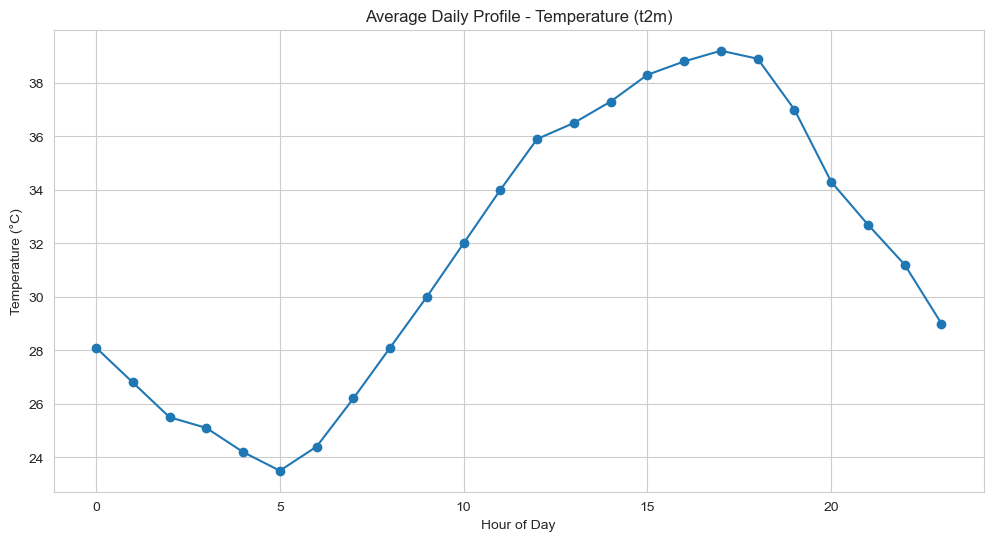

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(avg_profile['hour'], avg_profile['t2m'], marker='o')
plt.title('Average Daily Profile - Temperature (t2m)')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [85]:
stats_air = df.groupby('hour')['t2m'].describe()
print(stats_air)
percentile_50 = df.groupby('hour')['t2m'].quantile(0.5)
for value in percentile_50:
    print(value)
print("percentile 90")
percentile_90 = df.groupby('hour')['t2m'].quantile(1.0)
for value in percentile_90:
    print(value)

      count       mean       std   min    25%   50%    75%   max
hour                                                            
0     123.0  19.904878  2.430673  14.0  18.80  19.7  21.55  28.1
1     123.0  19.242276  2.402185  13.4  18.10  19.2  20.85  26.8
2     123.0  18.618699  2.350527  12.9  17.40  18.5  20.15  25.5
3     123.0  18.129268  2.387595  12.4  16.65  17.9  19.70  25.1
4     123.0  17.681301  2.424038  11.7  16.10  17.6  19.40  24.2
5     123.0  17.491870  2.395782  11.7  15.95  17.2  19.20  23.5
6     123.0  18.482114  2.271420  12.6  17.20  18.5  19.85  24.4
7     123.0  20.749593  2.128895  13.6  19.40  21.0  21.90  26.2
8     123.0  23.052846  1.924830  17.7  21.75  23.1  24.20  28.1
9     123.0  25.287805  1.838236  21.1  24.05  25.2  26.50  30.0
10    123.0  27.124390  1.822102  23.3  25.80  26.9  28.25  32.0
11    123.0  28.751220  1.789375  24.6  27.60  28.5  29.70  34.0
12    123.0  29.898374  1.784128  26.4  28.60  29.5  30.90  35.9
13    123.0  30.773171  1

In [81]:
stats_glob = df.groupby('hour')['ssrd'].describe()
print(stats_glob)
percentile_50 = df.groupby('hour')['ssrd'].quantile(0.5)
for value in percentile_50:
    print(value)
print("percentile 90")
percentile_90 = df.groupby('hour')['ssrd'].quantile(0.9)
for value in percentile_90:
    print(value)

      count        mean         std    min    25%    50%    75%    max
hour                                                                  
0     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
1     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
2     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
3     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
4     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
5     123.0    2.691057    3.516076    0.0    0.0    0.0    6.0   10.0
6     123.0   42.536585   28.473540    0.0   15.0   46.0   69.5   87.0
7     123.0  144.211382   51.287082   18.0  108.0  154.0  187.0  216.0
8     123.0  276.878049   62.534395  124.0  241.0  287.0  327.0  368.0
9     123.0  419.756098   68.678551  267.0  383.0  432.0  477.0  520.0
10    123.0  552.894309   72.567641  302.0  507.5  564.0  612.0  657.0
11    123.0  660.991870   77.532277  286.0  610.5  679.0  724.0  766.0
12    

In [8]:
stats_dir = df.groupby('hour')['dni'].describe()
print(stats_dir)
percentile_50 = df.groupby('hour')['dni'].quantile(0.5)
for value in percentile_50:
    print(value)

percentile_90 = df.groupby('hour')['dni'].quantile(0.9)
for value in percentile_90:
    print(value)

      count        mean         std    min    25%    50%    75%    max
hour                                                                  
0     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
1     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
2     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
3     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
4     123.0    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0
5     123.0    9.918699   16.471333    0.0    0.0    0.0   20.0   60.0
6     123.0  178.170732  100.594520    0.0  100.0  205.0  267.5  323.0
7     123.0  377.691057   93.512350   38.0  316.0  397.0  456.5  514.0
8     123.0  505.642276  113.178673   33.0  448.0  543.0  590.5  639.0
9     123.0  604.308943  114.805547   96.0  544.5  652.0  689.0  725.0
10    123.0  672.130081  111.460422  228.0  642.5  717.0  750.5  782.0
11    123.0  716.861789  115.171243  158.0  703.5  757.0  787.5  817.0
12    

In [9]:
stats_diff = df.groupby('hour')['dhi'].describe()
print(stats_diff)
percentile_50 = df.groupby('hour')['dhi'].quantile(0.5)
for value in percentile_50:
    print(value)

      count        mean        std    min    25%    50%    75%    max
hour                                                                 
0     123.0    0.000000   0.000000    0.0    0.0    0.0    0.0    0.0
1     123.0    0.000000   0.000000    0.0    0.0    0.0    0.0    0.0
2     123.0    0.000000   0.000000    0.0    0.0    0.0    0.0    0.0
3     123.0    0.000000   0.000000    0.0    0.0    0.0    0.0    0.0
4     123.0    0.000000   0.000000    0.0    0.0    0.0    0.0    0.0
5     123.0    2.195122   2.795367    0.0    0.0    0.0    5.0    8.0
6     123.0   23.455285  14.968410    0.0   10.5   24.0   38.0   54.0
7     123.0   57.203252  18.389216   10.0   46.0   59.0   68.5  102.0
8     123.0   87.203252  19.793590   49.0   74.0   85.0   95.0  156.0
9     123.0  108.642276  25.298911   74.0   91.0  104.0  116.5  230.0
10    123.0  123.894309  29.227152   91.0  103.5  117.0  135.5  254.0
11    123.0  133.869919  34.923795  100.0  111.0  124.0  141.5  286.0
12    123.0  142.715

In [69]:
stats_rh = df.groupby('hour')['r2m'].describe()
print(stats_rh)
percentile_50 = df.groupby('hour')['r2m'].quantile(0.5)
for value in percentile_50:
    print(value)

      count      mean       std   min    25%   50%    75%   max
hour                                                           
0     123.0  0.736260  0.119654  0.44  0.650  0.76  0.820  0.99
1     123.0  0.758455  0.117773  0.47  0.675  0.77  0.840  1.00
2     123.0  0.777967  0.113332  0.49  0.700  0.79  0.860  1.00
3     123.0  0.792439  0.108116  0.50  0.725  0.80  0.870  1.00
4     123.0  0.808130  0.103855  0.52  0.740  0.82  0.890  1.00
5     123.0  0.815935  0.101488  0.53  0.750  0.82  0.890  1.00
6     123.0  0.789512  0.106578  0.52  0.715  0.80  0.870  1.00
7     123.0  0.714472  0.109852  0.48  0.640  0.72  0.800  1.00
8     123.0  0.635528  0.104263  0.41  0.565  0.64  0.710  0.91
9     123.0  0.563821  0.096305  0.36  0.500  0.56  0.630  0.80
10    123.0  0.506585  0.094850  0.31  0.455  0.51  0.570  0.74
11    123.0  0.459675  0.096597  0.25  0.400  0.45  0.530  0.71
12    123.0  0.420976  0.094474  0.23  0.365  0.42  0.490  0.63
13    123.0  0.390569  0.089830  0.21  0

In [70]:
stats_press = df.groupby('hour')['sp'].describe()
print(stats_press)
percentile_50 = df.groupby('hour')['sp'].quantile(0.5)
for value in percentile_50:
    print(value)

      count           mean         std       min       25%       50%  \
hour                                                                   
0     123.0  101590.666667  375.190240  100400.0  101400.0  101600.0   
1     123.0  101567.967480  369.310544  100400.0  101400.0  101600.0   
2     123.0  101550.975610  380.240421  100300.0  101306.0  101585.0   
3     123.0  101519.926829  381.580990  100300.0  101300.0  101510.0   
4     123.0  101502.569106  380.848408  100200.0  101300.0  101500.0   
5     123.0  101495.910569  388.270440  100200.0  101300.0  101500.0   
6     123.0  101489.308943  391.938460  100200.0  101239.5  101500.0   
7     123.0  101495.869919  389.794838  100200.0  101300.0  101500.0   
8     123.0  101492.349593  388.431735  100200.0  101250.0  101500.0   
9     123.0  101486.813008  390.022495  100200.0  101200.0  101500.0   
10    123.0  101473.365854  396.612527  100100.0  101200.0  101500.0   
11    123.0  101450.178862  403.868365  100100.0  101200.0  1015

In [71]:
percentile_90 = df.groupby('hour')['t2m'].quantile(0.9)
print(percentile_90)

hour
0     22.80
1     22.18
2     21.50
3     21.28
4     20.76
5     20.78
6     21.60
7     23.38
8     25.58
9     27.50
10    29.30
11    31.00
12    32.20
13    33.36
14    33.90
15    33.60
16    33.36
17    33.00
18    32.18
19    31.18
20    29.04
21    26.54
22    25.08
23    24.00
Name: t2m, dtype: float64


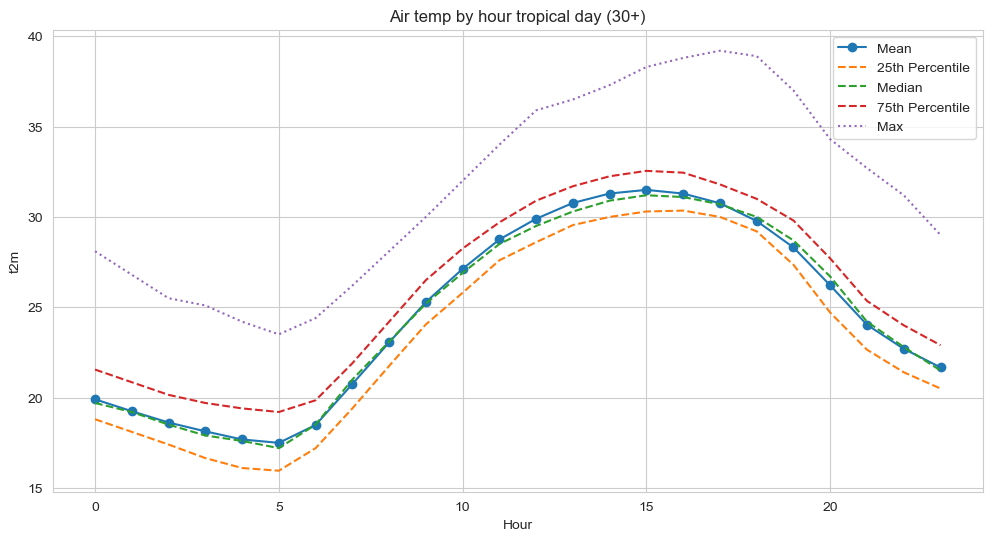

In [72]:
import matplotlib.pyplot as plt

# Plot selected stats
plt.figure(figsize=(12, 6))

# Plot mean, 25%, 50%, 75%, max
plt.plot(stats_air.index, stats_air['mean'], label='Mean', marker='o')
plt.plot(stats_air.index, stats_air['25%'], label='25th Percentile', linestyle='--')
plt.plot(stats_air.index, stats_air['50%'], label='Median', linestyle='--')
plt.plot(stats_air.index, stats_air['75%'], label='75th Percentile', linestyle='--')
plt.plot(stats_air.index, stats_air['max'], label='Max', linestyle=':')

plt.xlabel('Hour')
plt.ylabel('t2m')
plt.title('Air temp by hour tropical day (30+)')
plt.legend()
plt.grid(True)
plt.show()

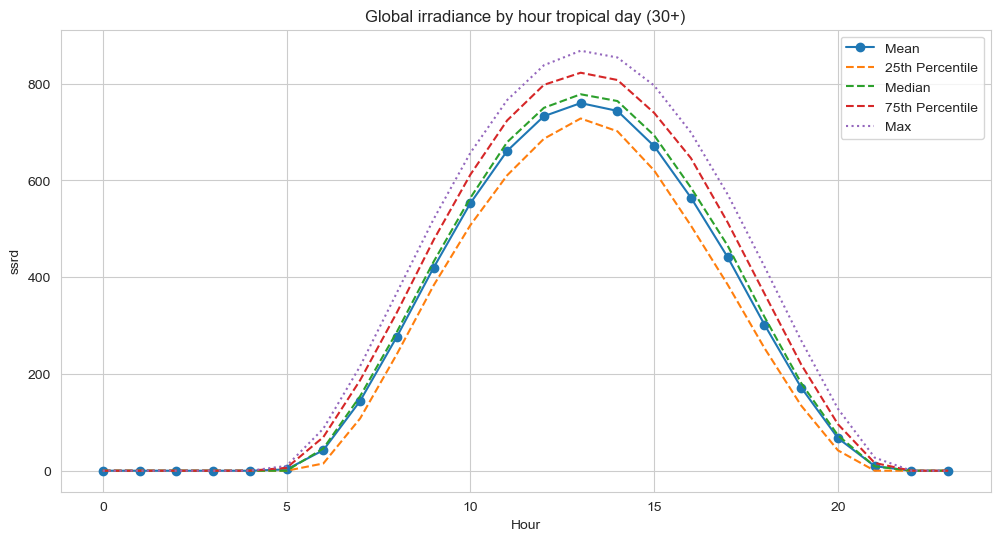

In [73]:
# Plot selected stats
plt.figure(figsize=(12, 6))

# Plot mean, 25%, 50%, 75%, max
plt.plot(stats_glob.index, stats_glob['mean'], label='Mean', marker='o')
plt.plot(stats_glob.index, stats_glob['25%'], label='25th Percentile', linestyle='--')
plt.plot(stats_glob.index, stats_glob['50%'], label='Median', linestyle='--')
plt.plot(stats_glob.index, stats_glob['75%'], label='75th Percentile', linestyle='--')
plt.plot(stats_glob.index, stats_glob['max'], label='Max', linestyle=':')

plt.xlabel('Hour')
plt.ylabel('ssrd')
plt.title('Global irradiance by hour tropical day (30+)')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
def plot_stats(stats, y_label='Value', title='Descriptive Stats Plot'):
    """
    Plots selected descriptive statistics from a stats DataFrame.

    Parameters:
    - stats: DataFrame returned from df.groupby(...).describe()
    - y_label: Label for the y-axis
    - title: Title of the plot
    """
    plt.figure(figsize=(12, 6))

    # Plotting different stats
    plt.plot(stats.index, stats['mean'], label='Mean', marker='o')
    plt.plot(stats.index, stats['25%'], label='25th Percentile', linestyle='--')
    plt.plot(stats.index, stats['50%'], label='Median', linestyle='--')
    plt.plot(stats.index, stats['75%'], label='75th Percentile', linestyle='--')
    plt.plot(stats.index, stats['max'], label='Max', linestyle=':')

    plt.xlabel('Hour')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

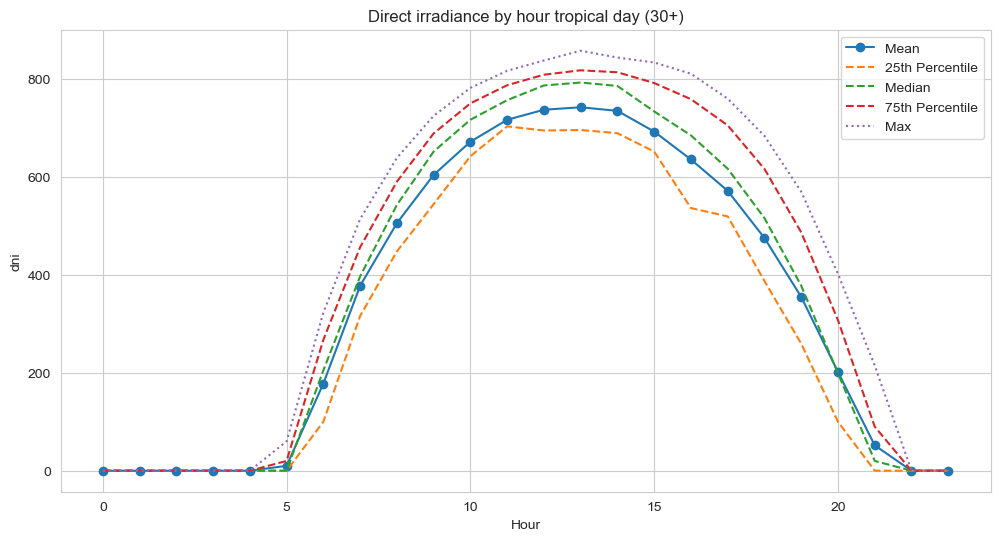

In [75]:
plot_stats(stats_dir, y_label='dni', title='Direct irradiance by hour tropical day (30+)')

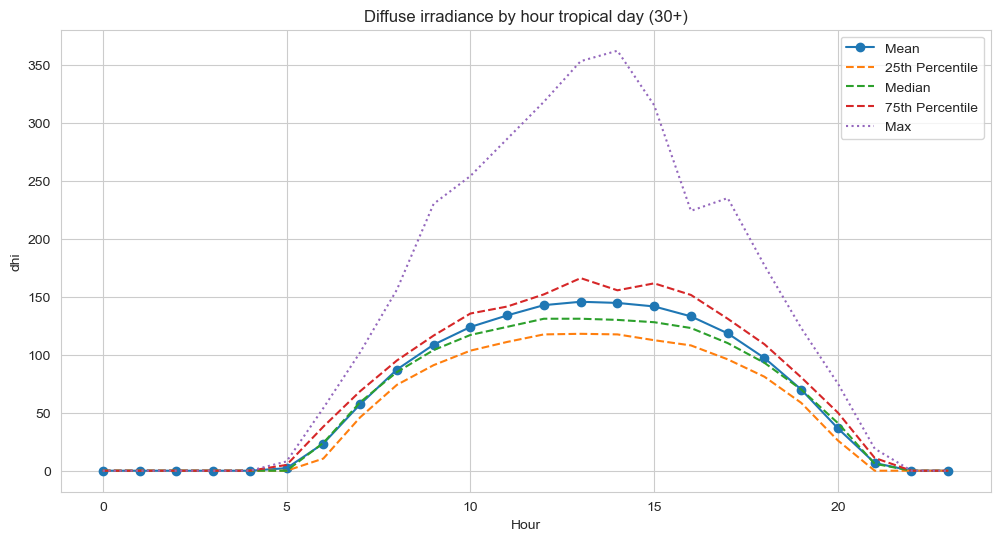

In [76]:
plot_stats(stats_diff, y_label='dhi', title='Diffuse irradiance by hour tropical day (30+)')

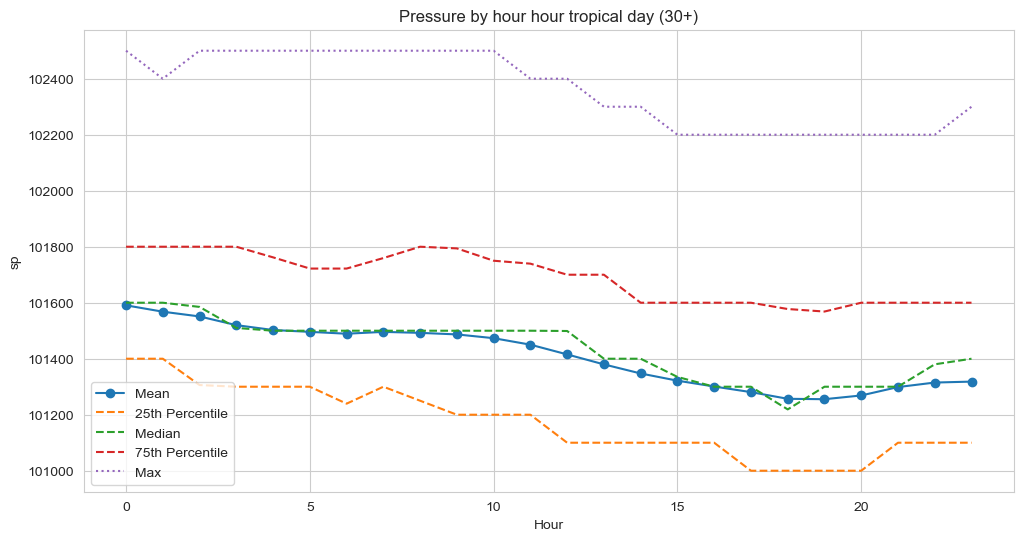

In [77]:
plot_stats(stats_press, y_label='sp', title='Pressure by hour hour tropical day (30+)')

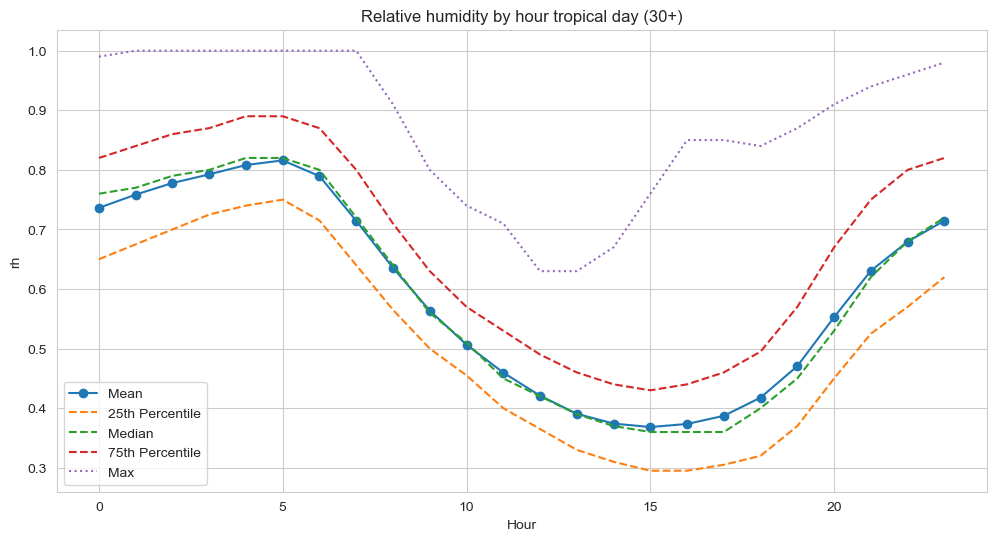

In [78]:
plot_stats(stats_rh, y_label='rh', title='Relative humidity by hour tropical day (30+)')